Josh Ye
https://data.wprdc.org/dataset/arrest-data


* First, I imported the data from the arrest_data.csv file, specifying the column to use
* We can see that the data frame is keeping track of every single line's incident neightborhood

In [88]:
import pandas as pd

data_frame = pd.read_csv("arrest_data.csv", sep=",", usecols=["OFFENSES","INCIDENTNEIGHBORHOOD"])
print(data_frame)

                                                OFFENSES  \
0                                     3929 Retail Theft.   
1           13(a)(16) Possession of Controlled Substance   
2                                     3929 Retail Theft.   
3      5503 Disorderly Conduct. / 5505 Public Drunken...   
4      2702 Aggravated Assault. / 2705 Recklessy Enda...   
...                                                  ...   
58317  2709(a)(1) Harassment by Physical Contact, or ...   
58318  2701(a)(1) Simple Assault - Intent., Know., Re...   
58319  2709(a)(1) Harassment by Physical Contact, or ...   
58320  9015 Failure To Appear/Arrest on Attachment Order   
58321                               2701 Simple Assault.   

            INCIDENTNEIGHBORHOOD  
0                     Bloomfield  
1                   Outside City  
2                       Westwood  
3                 East Allegheny  
4                Crafton Heights  
...                          ...  
58317                    Carrick  

* I then imported the map data, in order to see what locations we were actually going to be displaying on the map.
    * This is important because of certain naming structures used in the map data vs the arrest data.

['Chateau', 'Summer Hill', 'Northview Heights', 'Spring Hill-City View', 'Perry South', 'Fineview', 'Central Northside', 'Spring Garden', 'Troy Hill', 'East Allegheny', 'Manchester', 'Allegheny West', 'North Shore', 'Allegheny Center', 'Brighton Heights', 'Marshall-Shadeland', 'California-Kirkbride', 'Perry North', 'Hays', 'Lincoln Place', 'New Homestead', 'Homewood South', 'Lincoln-Lemington-Belmar', 'East Hills', 'Bloomfield', 'Highland Park', 'Garfield', 'Morningside', 'Larimer', 'Friendship', 'Regent Square', 'Shadyside', 'Point Breeze North', 'Homewood North', 'Homewood West', 'East Liberty', 'Central Oakland', 'North Oakland', 'West Oakland', 'Crawford-Roberts', 'Strip District', 'Central Business District', 'Central Lawrenceville', 'Middle Hill', 'Squirrel Hill North', 'Terrace Village', 'Bluff', 'Hazelwood', 'South Oakland', 'Greenfield', 'Squirrel Hill South', 'Stanton Heights', 'Lower Lawrenceville', 'Point Breeze', 'Swisshelm Park', 'Upper Lawrenceville', 'Polish Hill', 'Bed

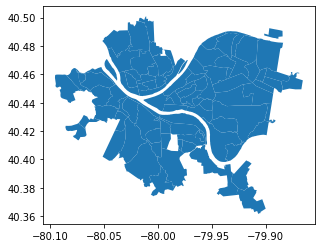

In [50]:
import geopandas
neighborhoods = geopandas.read_file("Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe
locations = neighborhoods['hood'].tolist()
print(locations)

* As there is no obvious amount of incidents field, I would need to track this through iteration.
* I wanted this information to be trimmed down so that it would track every location and have its own value to count how many instances of a crime.
* I used a dictionary as they have an easy way to find the key, without having to iterate through the data structure.
    * If the dictionary does not have a neighborhood within its keys, it would start it would a default value of 1.
    * If the dictionary had the key, take its value and update it by 1.

In [78]:
#Variables
dictionary = {} #Tracks all instances of crimes
dSevere = {} #Specifically instances of severe crimes
dNotSevere = {} #Specifically non-severe crimes
keywords = ["Homicide", "Death" ,"Terroristic", "Sexual", "Rape", "Assault", "DUI", "Firearm", "Stalking", "Harassment", "Vehicle"] #used to check more severe crimes
rowNum = 0

#Helper function to add to a dictionary, checks if it already exists, and adds if it does.
#Two parameters: (Location, Crime)
#Returns: Nothing
def addToDictionary(location, crime): 
    if(location in dictionary): #if the item is within the dictionary, update the value by 1
        value = int(dictionary.get(location)) + 1
        dictionary.update({location : value})
        if withinList(crime, keywords) == True: #Checks if the crime was severe, and updates the specific dictionary
            value = int(dSevere.get(location)) + 1
            dSevere.update({location : value})
        else:
            value = int(dNotSevere.get(location)) + 1
            dNotSevere.update({location : value})
    else: #otherwise, add the item to the dictionary with a default of 1
        dictionary.update({location : 1 })
        if withinList(crime, keywords) == True: #Checks if the crime was severe, needs to update both dictionaries to avoid NoneTypes/Null errors
            dSevere.update({location : 1})
            dNotSevere.update({location : 0})
        else:
            dNotSevere.update({location : 1})
            dSevere.update({location : 0})
    return


#Helper function that skims over a list to check if the items in the list are within a string.
#Parameters: (String to check, list to skim)
#Returns: boolean (T if within / F if not)
def withinList(crime, keywords):
    for key in keywords:
        if str(crime).find(key) != -1:
            return True     
    return False


#Main 
for row in data_frame.iterrows(): #for every row, 
    if(pd.isnull(data_frame.loc[rowNum, "INCIDENTNEIGHBORHOOD"])): #If no location, ignore
        rowNum+=1
        continue
        
    #Else 
    crime = data_frame.loc[rowNum, "OFFENSES"]
    if(data_frame.loc[rowNum, "INCIDENTNEIGHBORHOOD"] == "Mount Oliver"): #Specifically checking for Mount Oliver in order to fix naming issues
        addToDictionary("Mt. Oliver", crime)
        rowNum+=1 #iterate
    else:
        location = data_frame.loc[rowNum, "INCIDENTNEIGHBORHOOD"] #All other locations
        addToDictionary(location, crime)
        rowNum+=1 #iterate
    
    
for key,value in dictionary.items(): #for all key,value pairs within the dictionaries
    print(str(key) + " : " + str(value) + "\n\tSevere : " + str(dSevere[key]) + "\tNot Severe : " + str(dNotSevere[key]) + "\n")

Bloomfield : 880
	Severe : 349	Not Severe : 531

Outside City : 274
	Severe : 59	Not Severe : 215

Westwood : 203
	Severe : 108	Not Severe : 95

East Allegheny : 1893
	Severe : 363	Not Severe : 1530

Crafton Heights : 513
	Severe : 293	Not Severe : 220

Greenfield : 473
	Severe : 220	Not Severe : 253

Brookline : 1196
	Severe : 634	Not Severe : 562

Regent Square : 32
	Severe : 15	Not Severe : 17

East Liberty : 1652
	Severe : 580	Not Severe : 1072

East Hills : 1026
	Severe : 561	Not Severe : 465

Carrick : 2102
	Severe : 1018	Not Severe : 1084

Allegheny Center : 1122
	Severe : 290	Not Severe : 832

South Side Flats : 3053
	Severe : 1323	Not Severe : 1730

Sheraden : 1132
	Severe : 620	Not Severe : 512

East Carnegie : 47
	Severe : 31	Not Severe : 16

Golden Triangle/Civic Arena : 83
	Severe : 27	Not Severe : 56

Point Breeze North : 249
	Severe : 127	Not Severe : 122

Perry South : 954
	Severe : 477	Not Severe : 477

Allentown : 855
	Severe : 377	Not Severe : 478

North Shore : 722


* With this information, I could sort the data to show the locations that were the best. (i.e Locations with the lowest crime rates)
* I created single dataframe that contains the total amounts for all 3 categories, and sorted them by the total

In [112]:
full_frame = pd.DataFrame([dictionary, dSevere, dNotSevere]).transpose().rename(columns={0 : "Total", 1 : "Severe", 2 : "Non-Severe"}).sort_values(by="Total")
#Creates a dataframe using a list of dictionaries, transpose to rotate the frame to be vertical, then renamed the columns, and sorted by the data by the total column

print(full_frame)

                           Total  Severe  Non-Severe
Mt. Oliver Neighborhood        2       1           1
Troy Hill-Herrs Island         6       1           5
Mt. Oliver Boro               18       8          10
Central Northside             23       4          19
Ridgemont                     32      11          21
...                          ...     ...         ...
Homewood South              1863     690        1173
East Allegheny              1893     363        1530
Carrick                     2102    1018        1084
South Side Flats            3053    1323        1730
Central Business District   3570    1124        2446

[98 rows x 3 columns]


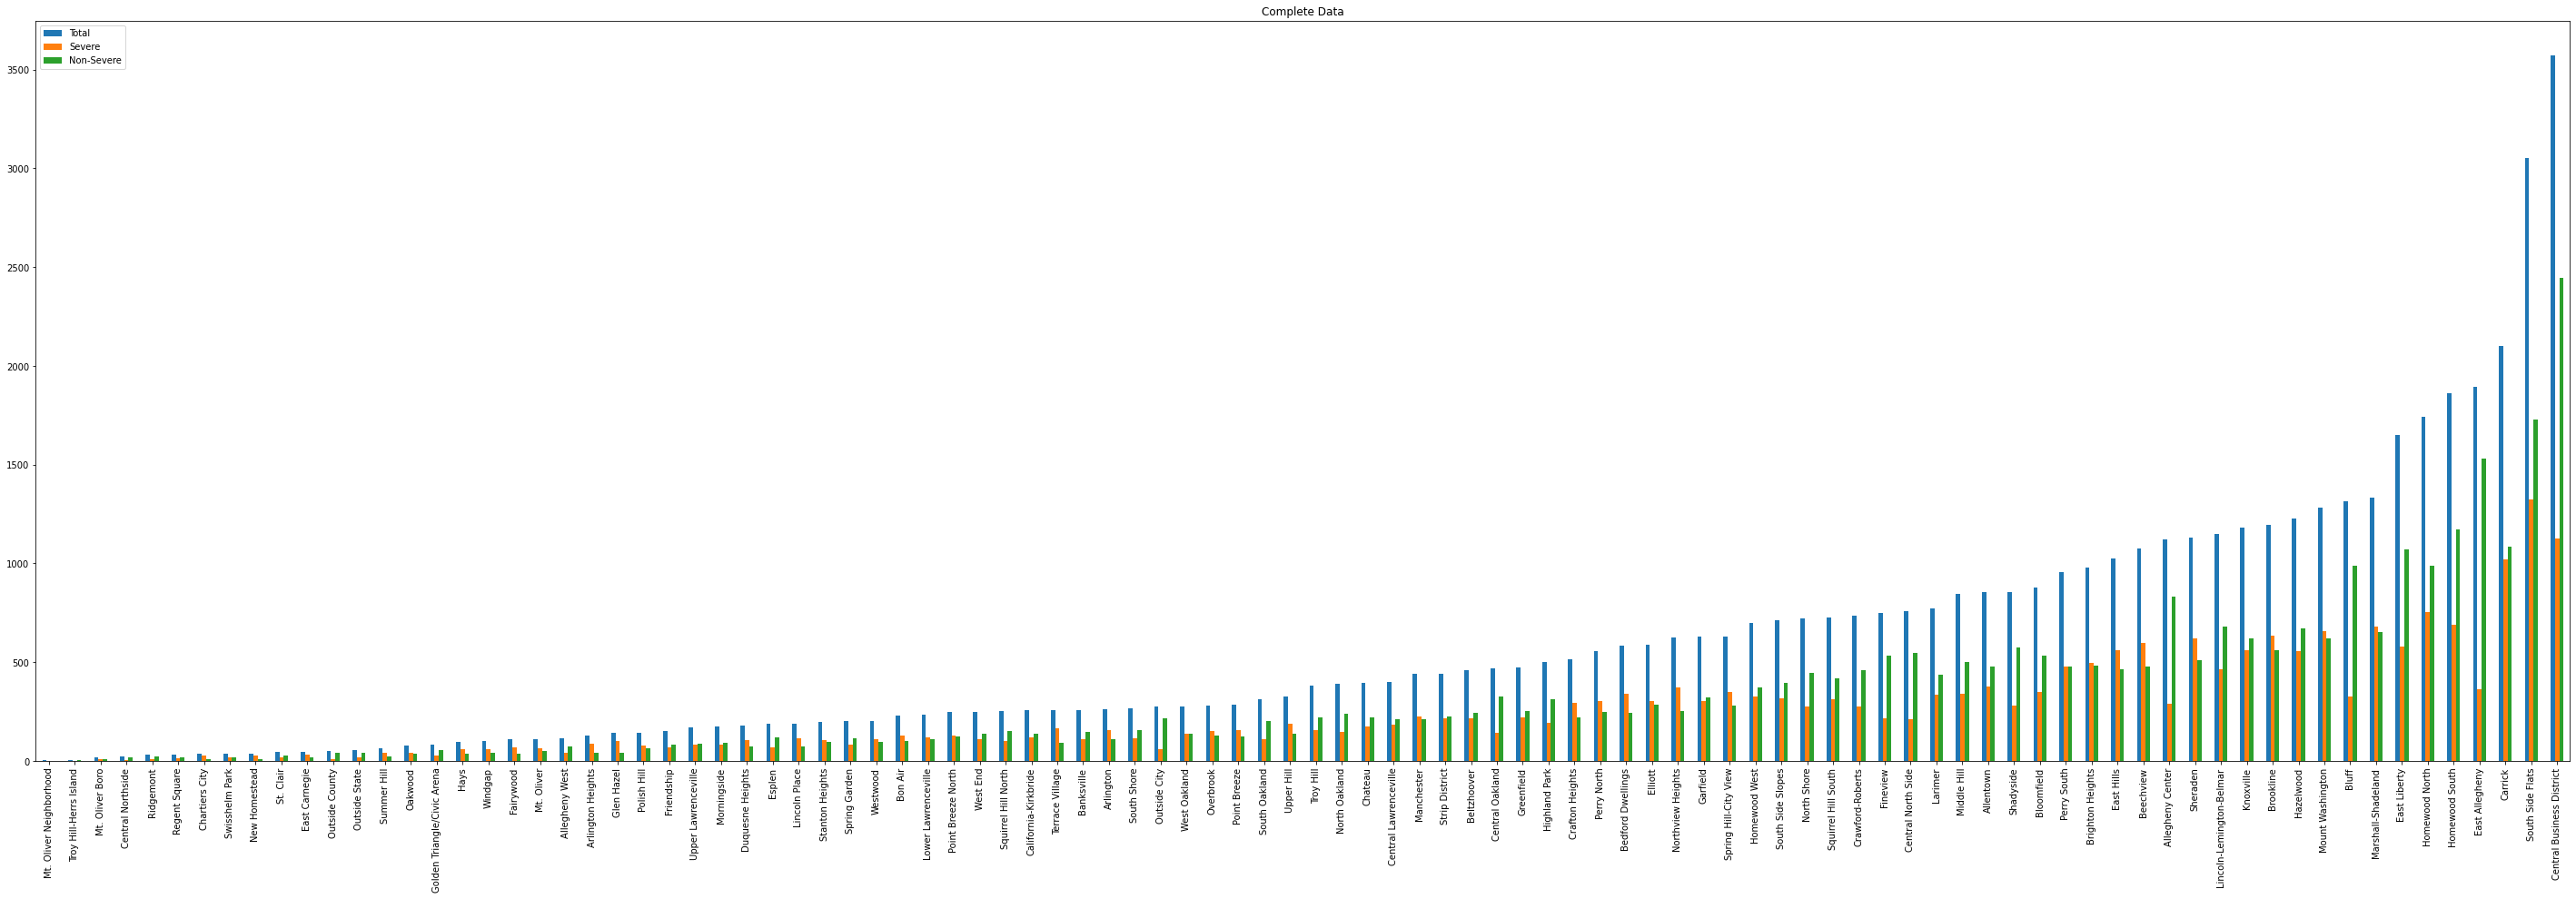

In [142]:
full_frame.plot(kind="bar", figsize=(50,15), title="Complete Data")

* Then I plotted the map, based upon the amount.
    * As there are very few locations with high amounts of arrests it's easier to highlight those areas.

,hood,Total,Severe,Non-Severe
6,Central Northside,23,4,19
30,Regent Square,32,15,17
88,Ridgemont,32,11,21
86,Chartiers City,38,29,9
54,Swisshelm Park,38,18,20
...,...,...,...,...
21,Homewood South,1863,690,1173
9,East Allegheny,1893,363,1530
76,Carrick,2102,1018,1084
61,South Side Flats,3053,1323,1730


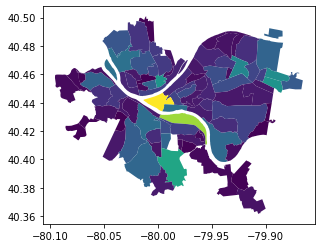

In [157]:
complete_map = neighborhoods.merge(full_frame, how='left', left_on='hood', right_on=full_frame.index) #merge map and dataframe
complete_map.plot(column='Total') #plot based upon totals
complete_map[['hood','Total','Severe','Non-Severe']].sort_values(by='Total', ascending=True) #Prints to check if merge succeeded
#print(complete_map['geometry'])

* Finally, I made the graph more readable.

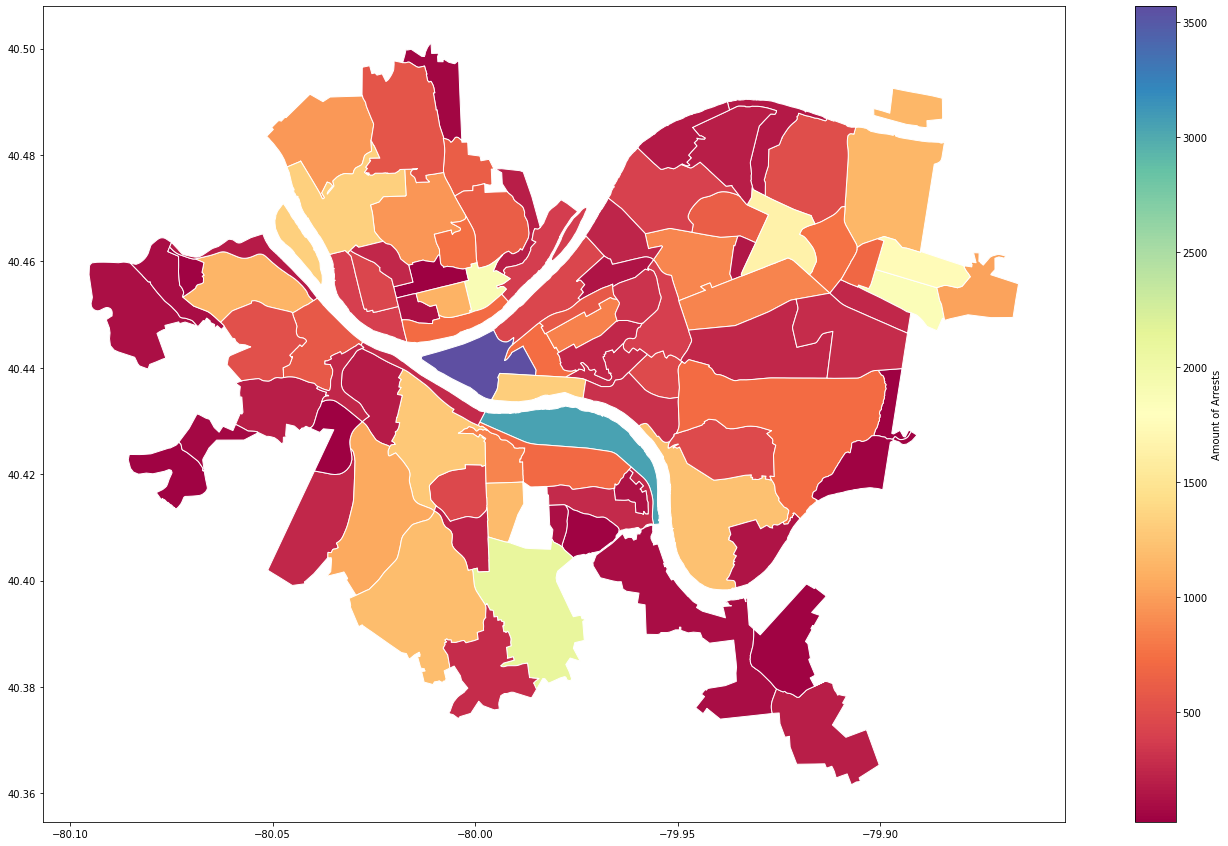

In [180]:
complete_map.plot(column='Total', # set the data to be used for coloring
               cmap='Spectral',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Amount of Arrests"}, # label the legend
               figsize=(25, 15), # set the size
               )

* The conclusion based upon this arrest data's time frame is that:
    * There are very few locations that have high amounts of arrests:
        * The 3 worst locations are Carrick, South Side Flats, and the Central Business District
    * There are many locations where there are low arrest rates:
        * The overall "best" neighborhood would have to be Mt. Oliver or the Troy Hill / Herrs Island area.
        * If the Mt. Oliver is not being considered, then the overall "best" would be Central Northside.
        * If we're talking specifically the Oakland area, West Oakland 274, South Oakland 311, North Oakland 390, Central Oakland 469
* If we look at maps that focus on both Severe Crimes and Non-Severe, the outcomes do not change.

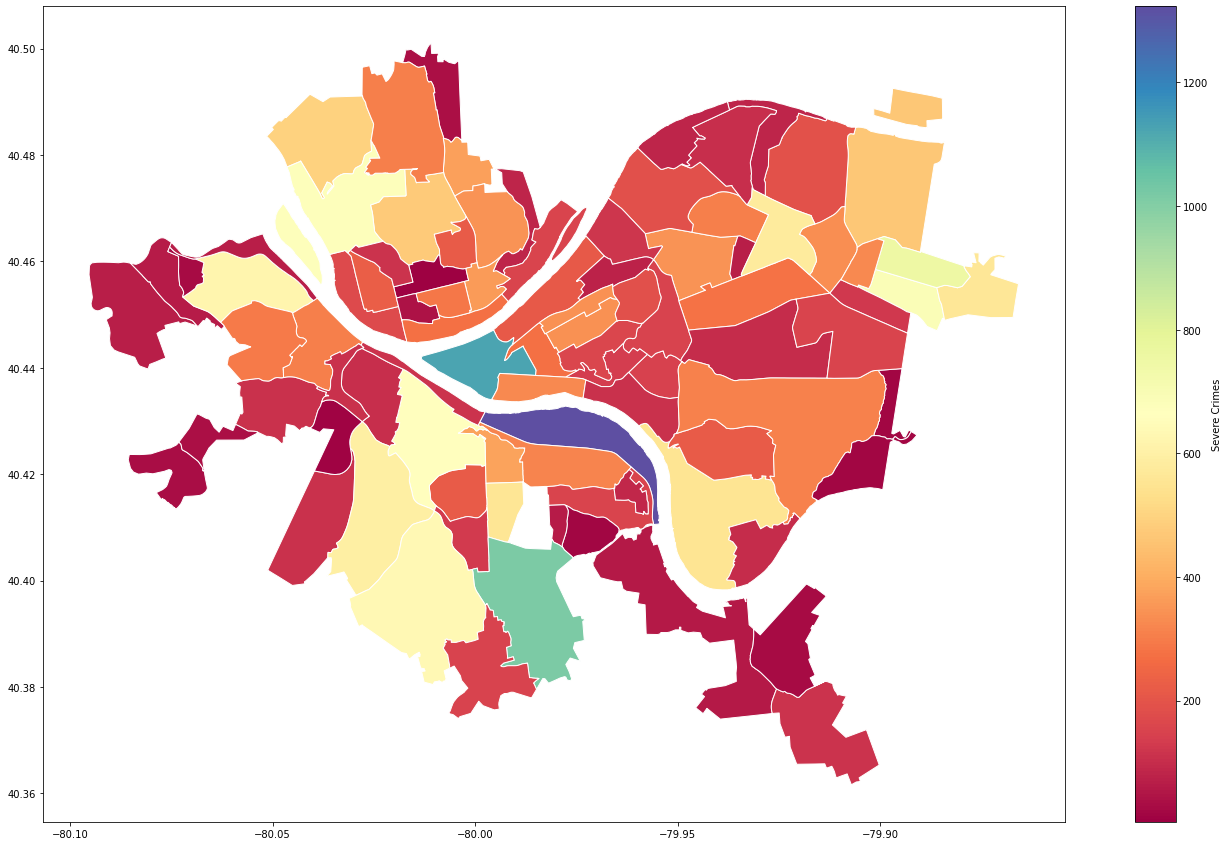

In [136]:
complete_map.plot(column='Severe', # set the data to be used for coloring
               cmap='Spectral',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Severe Crimes"}, # label the legend
               figsize=(25, 15),         # set the size
               )

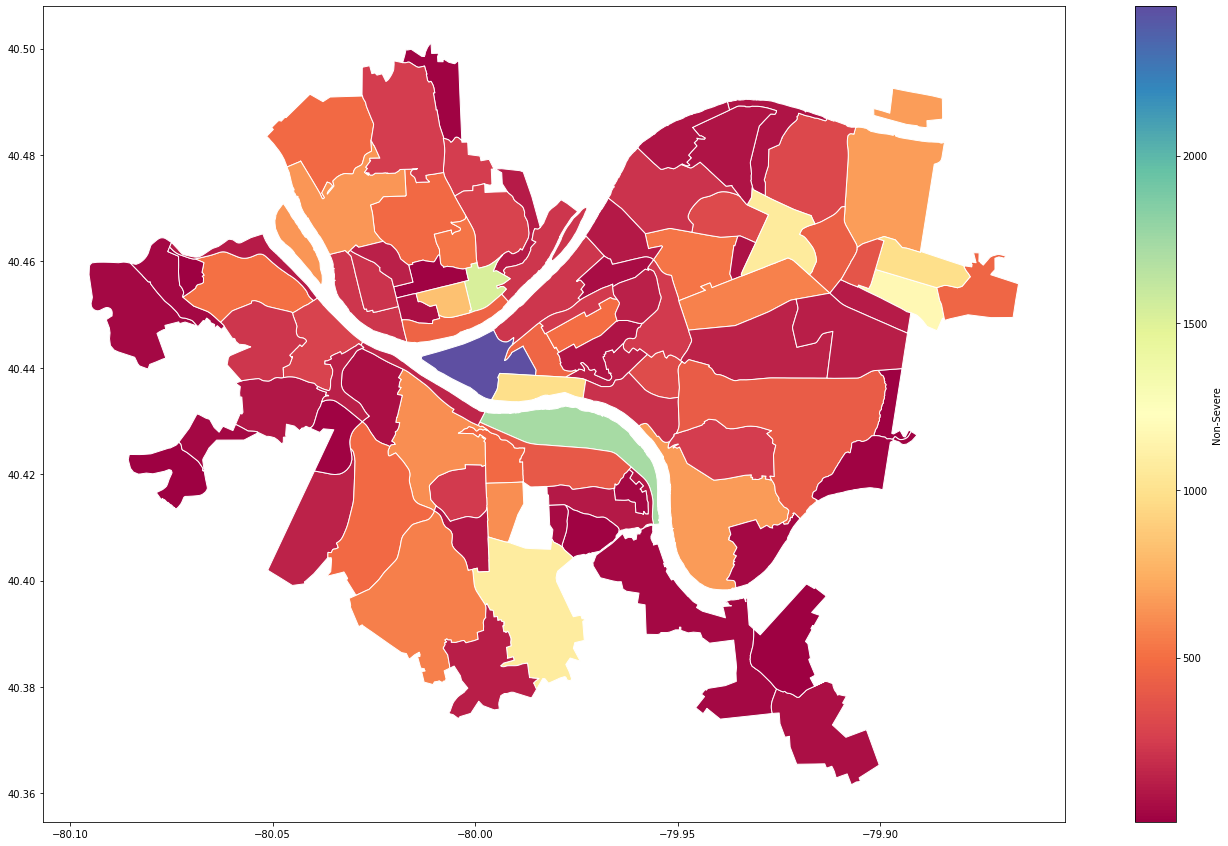

In [137]:
complete_map.plot(column='Non-Severe', # set the data to be used for coloring
               cmap='Spectral',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Non-Severe"}, # label the legend
               figsize=(25, 15),         # set the size
               )

![map](map.jpg)